In [ ]:
try:
    import import_ipynb
except :
    !pip install import_ipynb
    import import_ipynb
import Predistim_Library as pl

In [ ]:
import os
import pandas as pd
from scipy.io import loadmat
import glob
from plotnine import ggplot, aes, geom_point, labs
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_errorbar, geom_line, geom_point, labs, theme_minimal
import nibabel as nib
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# read mat files for building a dataframe

In [ ]:
mat_data_tmp = loadmat("/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01024FC_ses-M00/mrGradT1only/mrGrad_t1overt2.mat")
y_data_0 = np.array(mat_data['RG'][0][0]['Y'][0][0][0][0]).flatten()
y_data_1 = np.array(mat_data['RG'][0][1]['Y'][0][0][0][0]).flatten()

In [ ]:
y_data_0

array([1.1241256 , 1.13753253, 1.1804086 , 1.20567548, 1.15289927,
       1.14132714, 1.08736807])

In [ ]:
y_data_1

array([1.13126057, 1.16363239, 1.16156942, 1.21298784, 1.21372914,
       1.16881806, 1.07299924])

In [ ]:
df_cleaned.loc["01-024"]

Left-Putamen_seg1          3.391178
Left-Putamen_seg2          1.640284
Left-Putamen_seg3          0.740510
Left-Putamen_seg4          0.483652
Left-Putamen_seg5          0.350901
Left-Putamen_seg6          0.417473
Left-Putamen_seg7          1.959341
Right-Putamen_seg1         1.058137
Right-Putamen_seg2         0.580873
Right-Putamen_seg3         0.590500
Right-Putamen_seg4         0.458168
Right-Putamen_seg5         0.459325
Right-Putamen_seg6         0.629122
Right-Putamen_seg7         0.880766
Putamen_axis1_seg1_asym    1.048719
Putamen_axis1_seg2_asym    0.953928
Putamen_axis1_seg3_asym    0.225408
Putamen_axis1_seg4_asym    0.054118
Putamen_axis1_seg5_asym   -0.267640
Putamen_axis1_seg6_asym   -0.404454
Putamen_axis1_seg7_asym    0.759531
pp_asym                    0.029145
Name: 01-024, dtype: float64

In [98]:
# Chemin vers les fichiers
base_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/"
#file_pattern = "sub-*/mrGrad/mrGrad_t1overt2.mat"
file_pattern = "sub-*/mrGradT1only/mrGrad_t1overt2.mat"
#file_pattern = "sub-*/mrGradQSMoverR2/mrGrad_t1overt2.mat"
#file_pattern = "sub-*/mrGradR2/mrGrad_t1overt2.mat"

# Récupérer les chemins des fichiers
# Ensure glob_files function exists and works correctly
try:
    file_paths = glob.glob(os.path.join(base_path, file_pattern), recursive=True)
except AttributeError as e:
    print(f"Error: {e}. Ensure 'glob_files' is implemented in 'Predistim_Library'.")
    file_paths = []  # Fallback to an empty list if there's an error

# Initialiser une liste pour stocker les données
data = []

# Parcourir les fichiers et charger les données
for file_path in file_paths:
    #subject_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  # Extraire le nom du sujet
    mat_data = loadmat(file_path)  # Charger le fichier .mat
    try:
        subject_names = str(mat_data['RG'][0][0]['subject_names'][0][0][0][0][0])
        print(subject_names)
        # Extract and store data with labels
        try:
            roi_label_0 = mat_data['RG'][0][0]['ROI_label'][0][0][0]
            roi_label_1 = mat_data['RG'][0][1]['ROI_label'][0][0][0]
            y_data_0 = np.array(mat_data['RG'][0][0]['Y'][0][0][0][0]).flatten()
            y_data_1 = np.array(mat_data['RG'][0][1]['Y'][0][0][0][0]).flatten()

            data.append({
                'subject_name': subject_names,
                f"{roi_label_0}_seg1": y_data_0[0],
                f"{roi_label_0}_seg2": y_data_0[1],
                f"{roi_label_0}_seg3": y_data_0[2],
                f"{roi_label_0}_seg4": y_data_0[3],
                f"{roi_label_0}_seg5": y_data_0[4],
                f"{roi_label_0}_seg6": y_data_0[5],
                f"{roi_label_0}_seg7": y_data_0[6],
                f"{roi_label_1}_seg1": y_data_1[0],
                f"{roi_label_1}_seg2": y_data_1[1],
                f"{roi_label_1}_seg3": y_data_1[2],
                f"{roi_label_1}_seg4": y_data_1[3],
                f"{roi_label_1}_seg5": y_data_1[4],
                f"{roi_label_1}_seg6": y_data_1[5],
                f"{roi_label_1}_seg7": y_data_1[6],
            })
        except KeyError as e:
            print(f"KeyError: {e}. Ensure 'ROI_label' and 'Y' exist in mat_data['RG'].")
    except KeyError as e:
        print(f"KeyError: {e}. 'subject_names' not found in mat_data['RG'].")
    #data.append({'subject_name': subject_name, 'data': mat_data})

# Créer un DataFrame
df = pd.DataFrame(data).set_index('subject_name')

# Clean index
df_cleaned = df.dropna()
df_cleaned.index = df_cleaned.index.str.replace("sub-", "", regex=False)
df_cleaned.index = df_cleaned.index.str.replace("_ses-M00", "", regex=False)
df_cleaned.index = df_cleaned.index.str.slice(0, 2).str.cat(df_cleaned.index.str.slice(2,-2), sep="-")

print(df_cleaned)

sub-01010VD_ses-M00
sub-01043GC_ses-M00
sub-02074AS_ses-M00
sub-02089SL_ses-M00
sub-02087TD_ses-M00
sub-05011VJ_ses-M00
sub-05023GV_ses-M00
sub-05030DN_ses-M00
sub-05036PJ_ses-M00
sub-06078BS_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07055BC_ses-M00
sub-07058PP_ses-M00
sub-07092DH_ses-M00
sub-08018JC_ses-M00
sub-08027BB_ses-M00
sub-13031GA_ses-M00
sub-13038RS_ses-M00
sub-14009DP_ses-M00
sub-17010BG_ses-M00
sub-17020LP_ses-M00
sub-17032TJ_ses-M00
sub-17050PD_ses-M00
sub-17071PM_ses-M00
sub-19012GD_ses-M00
sub-05014BJ_ses-M00
sub-02080RM_ses-M00
sub-06003LP_ses-M00
sub-06035PD_ses-M00
sub-07021FC_ses-M00
sub-07033QJ_ses-M00
sub-07046PF_ses-M00
sub-09010NL_ses-M00
sub-11023OF_ses-M00
sub-13021DE_ses-M00
sub-13026RD_ses-M00
sub-15027LJ_ses-M00
sub-14029DC_ses-M00
sub-17068MJ_ses-M00
sub-18019CT_ses-M00
sub-19008GG_ses-M00
sub-19050PM_ses-M00
sub-04008QM_ses-M00
sub-07026BP_ses-M00
sub-01009WF_ses-M00
sub-06043VR_ses-M00
sub-04005BV_ses-M00
sub-06055CP_ses-M00
sub-06074WA_ses-M00


In [102]:
df_cleaned

Left-Putamen_seg1  Left-Putamen_seg2  Left-Putamen_seg3  \
subject_name                                                            
01-010                    219.0              218.0              213.0   
01-043                    148.0              148.0              143.0   
02-074                   1108.0             1163.0             1252.0   
02-089                   1409.5             1404.0             1351.0   
02-087                   1359.0             1338.0             1281.5   
...                         ...                ...                ...   
06-012                     97.0               92.0               95.0   
02-090                   1245.0             1259.0             1223.5   
05-028                   1065.5             1028.0              960.0   
17-004                     84.5               85.0               84.0   
06-027                    106.5              110.0              110.0   

              Left-Putamen_seg4  Left-Putamen_seg5  Left-Putamen_seg6  \
subject_name                                                            
01-010                    205.0              201.0              194.0   
01-043                    139.0              134.0              128.0   
02-074                   1349.0             1447.0             1518.0   
02-089                   1301.0             1238.0             1160.5   
02-087                   1220.0             1145.0             1066.0   
...                         ...                ...                ...   
06-012                     98.0              101.0              101.0   
02-090                   1183.0             1151.0             1070.0   
05-028                    899.5              870.0              842.0   
17-004                     80.0               78.0               76.0   
06-027                    107.0              100.0               95.0   

              Left-Putamen_seg7  Right-Putamen_seg1  Right-Putamen_seg2  \
subject_name                                                              
01-010                    191.0               221.0               218.0   
01-043                    124.0               145.0               144.0   
02-074                   1533.5              1061.0              1106.0   
02-089                   1084.5              1397.0              1368.0   
02-087                   1009.0              1335.0              1314.0   
...                         ...                 ...                 ...   
06-012                    101.0                98.0                91.0   
02-090                   1069.0              1282.0              1285.0   
05-028                    850.0               823.0               845.0   
17-004                     75.0                84.0                85.0   
06-027                     95.0               113.0               115.0   

              Right-Putamen_seg3  ...  Right-Putamen_seg5  Right-Putamen_seg6  \
subject_name                      ...                                           
01-010                     214.0  ...               206.0               197.5   
01-043                     142.0  ...               134.0               126.0   
02-074                    1203.0  ...              1379.0              1416.0   
02-089                    1305.0  ...              1193.0              1111.0   
02-087                    1250.0  ...              1156.0              1088.0   
...                          ...  ...                 ...                 ...   
06-012                      98.0  ...               107.0               109.0   
02-090                    1193.5  ...              1119.0              1047.0   
05-028                     882.5  ...              1012.0              1083.5   
17-004                      81.0  ...                78.0                75.0   
06-027                     115.0  ...               104.0                95.0   

              Right-Putamen_seg7  Putamen_axis1_seg1_asym  \
subject_name           

In [103]:
# Chemin vers les fichiers texte
base_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"
file_pattern = os.path.join(base_path, "sub-*_left-putamen_axis1_7segments_t1overt2_values.txt")

# Récupérer tous les fichiers correspondants
files = glob.glob(file_pattern)

# Initialiser une liste pour stocker les données
data = []

# Parcourir les fichiers et extraire les données
for file in files:
    # Extraire l'identifiant du sujet à partir du chemin du fichier
    subject_id = os.path.basename(file).split("_")[0]
    
    # Lire les valeurs du fichier texte
    with open(file, "r") as f:
        values_left = [float(line.strip()) for line in f.readlines()]

    with open(file.replace("left","right"), "r") as f:
        values_right = [float(line.strip()) for line in f.readlines()]

    # Ajouter les données dans la liste
    data.append([subject_id] + values_left + values_right)

# Créer un DataFrame
columns = ["subject_name"] + [f"Left-Putamen_seg{i}" for i in range(1, 8)] + [f"Right-Putamen_seg{i}" for i in range(1, 8)]
df = pd.DataFrame(data, columns=columns)

# Définir l'index comme l'identifiant du sujet
df.set_index("subject_name", inplace=True)

# Clean index
df_cleaned = df.dropna()
df_cleaned.index = df_cleaned.index.str.replace("sub-", "", regex=False)
df_cleaned.index = df_cleaned.index.str.replace("_ses-M00", "", regex=False)
df_cleaned.index = df_cleaned.index.str.slice(0, 2).str.cat(df_cleaned.index.str.slice(2,-2), sep="-")

# Afficher le DataFrame
print(df_cleaned)



              Left-Putamen_seg1  Left-Putamen_seg2  Left-Putamen_seg3  \
subject_name                                                            
01-035                 0.870618           0.924433           1.041931   
13-012                 1.114866           1.171333           1.264215   
19-004                 1.222980           1.274617           1.394724   
13-046                 1.398256           1.336480           1.323861   
19-044                 1.313441           1.360272           1.452225   
...                         ...                ...                ...   
02-058                 1.082265           1.186669           1.321484   
07-024                 1.230244           1.301046           1.480369   
09-012                 1.334240           1.457054           1.690496   
17-065                 0.948364           0.941476           1.030427   
06-078                 0.822084           0.908822           1.057263   

              Left-Putamen_seg4  Left-Putamen_seg5

## Calcul de l'index Putamen_axis1_seg_asym

In [104]:
# Calculate asymmetry for each segment
n_segments=7
for seg in range(1, n_segments + 1):
    left = df_cleaned[f"Left-Putamen_seg{seg}"]
    right = df_cleaned[f"Right-Putamen_seg{seg}"]
    asym = (left - right) / ((left + right) / 2)
    df_cleaned[f"Putamen_axis1_seg{seg}_asym"] = asym



/tmp/ipykernel_2821713/2889281484.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2821713/2889281484.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2821713/2889281484.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

## Graphiques 

# Récuperer les valeurs UPDRS 

In [105]:
#1
df_msa = pd.read_excel(os.path.join(pl.STUDY_PATH, "csv_xlsx", "Romain_Juin2025.xlsx"), engine='openpyxl',sheet_name='UPDRSIII_COMPLET_V0')
print(df_msa.head())
df_msa.set_index("SUBJID", inplace=True)

#2
# Afficher toutes les colonnes contenant "DROIT" dans leur nom
droit_columns = df_msa.filter(regex="OF.*_.*DROIT", axis=1).columns
#print(len(droit_columns),droit_columns)

# Afficher toutes les colonnes contenant "DROIT" dans leur nom
gauche_columns = df_msa.filter(regex="OF.*_.*GCHE", axis=1).columns

df_msa['somme_droit'] = df_msa[droit_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_msa['somme_gauche'] = df_msa[gauche_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_msa['asymetry'] = df_msa['somme_droit'] - df_msa['somme_gauche']
df_msa['asymetry'].dropna(inplace=False)

                             SUBJID                            V12H_APRES  \
0  Subject Identifier for the Study  réalisation après 12h d'arret L-Dopa   
1                            01-001                                   Oui   
2                            01-002                                   Oui   
3                            01-003                                   Oui   
4                            01-004                                   Oui   

                                  DEMIVIE_AGONISTE                   H_LDOPA  \
0  réalisation après 5 demie-vies d'arret agoniste  heure de prise de L Dopa   
1                                              Oui                     09:00   
2                                              Oui                     09:47   
3                                               .K                     09:00   
4                                              Oui                     09:25   

       DOSE_LDOPA      OFF_H       ON_H15       ON_H30  

/tmp/ipykernel_2821713/965124861.py:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_2821713/965124861.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_2821713/965124861.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



SUBJID
Subject Identifier for the Study    0.0
01-001                              3.0
01-002                              1.0
01-003                              4.0
01-004                              2.0
                                   ... 
20-025                             -2.0
20-026                             -6.0
20-027                              2.0
20-028                              0.0
20-029                             -1.0
Name: asymetry, Length: 836, dtype: float64

In [106]:
# Calculate pp asymmetry for segments 5 to 7
pp_segments = [f"Putamen_axis1_seg{seg}_asym" for seg in range(5, 8)]
print(pp_segments)
df_cleaned["pp_asym"] = df_cleaned[pp_segments].mean(axis=1)
print(df_cleaned[pp_segments].mean(axis=1))

# Obtenir l'intersection des indices
intersection_index = df_cleaned.index.intersection(df_msa.index)

# Créer un DataFrame avec les données communes
df_intersection = pd.DataFrame({
    'T1overT2_asymetry_seg': df_cleaned.loc[intersection_index, 'pp_asym'],
    'motor_symptom_asymetry': df_msa.loc[intersection_index, 'asymetry']
})
df_intersection.dropna(inplace=True)
print(df_intersection)

['Putamen_axis1_seg5_asym', 'Putamen_axis1_seg6_asym', 'Putamen_axis1_seg7_asym']
subject_name
01-035    0.091863
13-012   -0.045574
19-004    0.012070
13-046    0.028267
19-044    0.089269
            ...   
02-058    0.022269
07-024   -0.067591
09-012    0.020048
17-065    0.035362
06-078    0.065484
Length: 567, dtype: float64
        T1overT2_asymetry_seg  motor_symptom_asymetry
01-035               0.091863                    -1.0
13-012              -0.045574                    12.0
19-004               0.012070                     1.0
13-046               0.028267                     8.0
19-044               0.089269                    -1.0
...                       ...                     ...
02-058               0.022269                    -7.0
07-024              -0.067591                     6.0
09-012               0.020048                     0.0
17-065               0.035362                    -6.0
06-078               0.065484                   -11.0

[564 rows x 2 colum

/tmp/ipykernel_2821713/2037353662.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
 # Graphique des lignes de putamen
left_columns = [f"Left-Putamen_seg{i}" for i in range(1, n_segments + 1)]
right_columns = [f"Right-Putamen_seg{i}" for i in range(1, n_segments + 1)]

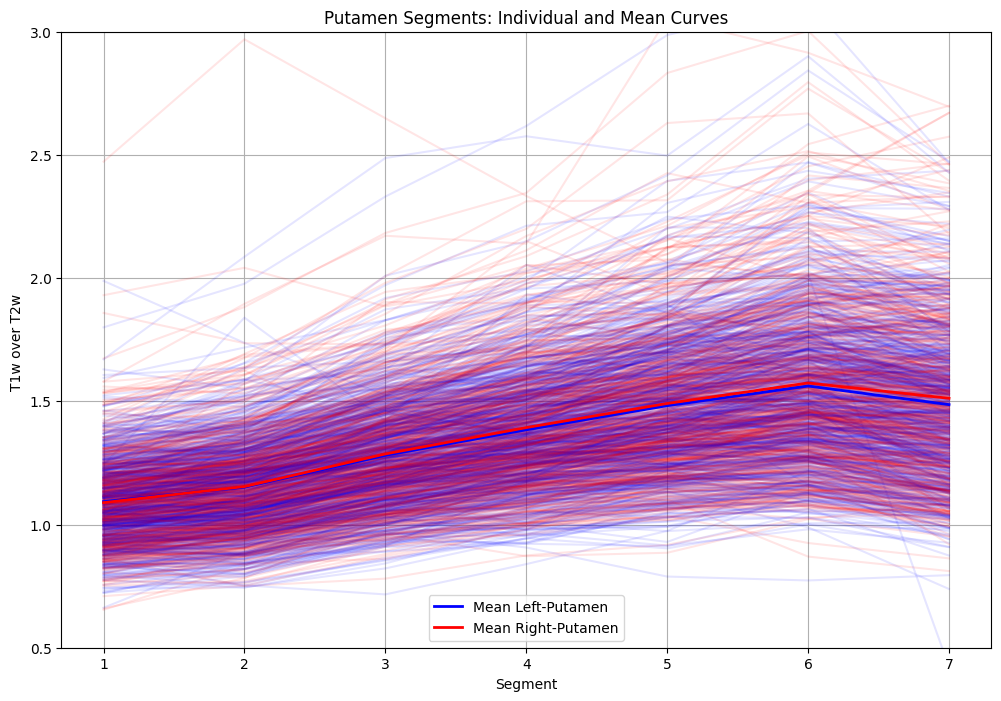

In [116]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les courbes transparentes pour chaque sujet
for subject in df_cleaned.index:
    ax.plot(range(1, len(left_columns) + 1), df_cleaned.loc[subject, left_columns], color='blue', alpha=0.1)
    ax.plot(range(1, len(right_columns) + 1), df_cleaned.loc[subject, right_columns], color='red', alpha=0.1)

# Tracer les moyennes en bleu et rouge foncé
ax.plot(range(1, len(left_columns) + 1), df_cleaned[left_columns].mean(), color='blue', label='Mean Left-Putamen', linewidth=2)
ax.plot(range(1, len(right_columns) + 1), df_cleaned[right_columns].mean(), color='red', label='Mean Right-Putamen', linewidth=2)

# Ajouter les labels et la légende
ax.set_title('Putamen Segments: Individual and Mean Curves')
ax.set_xlabel('Segment')
ax.set_ylabel('T1w over T2w ')
ax.set_xticks(range(1, len(left_columns) + 1))
ax.legend()
ax.grid(True)

ax.set_ylim(0.5, 3)

# Afficher le graphique
plt.show()

# Sauvegarder le graphique
fig.savefig("/NAS/deathrow/protocoles/predistim/screenshots/T1wOverT2wLinesPlot4AllSubjs.png")



In [ ]:
#df_intersection_filtered = df_intersection[df_intersection.index.str.startswith("01-")]
import statsmodels.api as sm
import plotly.express as px

# Filter out subjects with T1overT2_asymetry_seg greater than 100
df_intersection = df_intersection[df_intersection['T1overT2_asymetry_seg'] <= 50]
df_intersection = df_intersection[df_intersection['T1overT2_asymetry_seg'] > -50]

# Create groups based on the first two characters of the index
df_intersection['Group'] = df_intersection.index.str.slice(0, 2)

# Filter out rows where motor_symptom_asymetry is greater than 1 or less than -1
#df_intersection = df_intersection[(df_intersection['motor_symptom_asymetry'] <= 1) & (df_intersection['motor_symptom_asymetry'] >= -1)]
# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df_intersection,
    y='motor_symptom_asymetry',
    x='T1overT2_asymetry_seg',
    color='Group',  # Use 'Group' column to assign colors
    hover_name=df_intersection.index,
    labels={
        'T1overT2_asymetry_seg': 'T1overT2 Asymmetry',
        'motor_symptom_asymetry': 'Motor Symptom Asymmetry'
    },
    title="Interactive Scatter Plot of T1overT2 Asymmetry vs Motor Symptom Asymmetry"
)

#Ajouter les axes x=0 et y=0 en gris pointillé
fig.add_shape(
    type="line",
    x0=df_intersection['T1overT2_asymetry_seg'].min(),
    x1=df_intersection['T1overT2_asymetry_seg'].max(),
    y0=0, y1=0,
    line=dict(color="gray", dash="dot")
)

fig.add_shape(
    type="line",
    x0=0, x1=0,
    y0=df_intersection['motor_symptom_asymetry'].min(),
    y1=df_intersection['motor_symptom_asymetry'].max(),
    line=dict(color="gray", dash="dot")
)

# Calculer la droite de régression
X = df_intersection['T1overT2_asymetry_seg']
y = df_intersection['motor_symptom_asymetry']
X = sm.add_constant(X)  # Ajouter une constante pour le modèle
model = sm.OLS(y, X).fit()
df_intersection['regression_line'] = model.predict(X)

# Ajouter la droite de régression au graphique
fig.add_trace(
    px.line(
        df_intersection,
        x='T1overT2_asymetry_seg',
        y='regression_line'
    ).data[0]
)
# Calculer le R² et la p-value
r_squared = model.rsquared
p_value = model.pvalues.iloc[1]

# Afficher les résultats
print(f"R²: {r_squared:.4f}")
print(f"P-value: {p_value:.4e}")

fig.write_image("/NAS/deathrow/protocoles/predistim/screenshots/scatter_T1wOverT2w_vs_motor_symptom_asymmetry.png")

fig.show()

R²: 0.0000
P-value: 8.7064e-01


Traitement du patient : sub-01024FC_ses-M00
freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01024FC_ses-M00/t1overt2_norm_PSR.nii.gz:grayscale=0,10 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01024FC_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01024FC_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01024FC_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01024FC_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5;


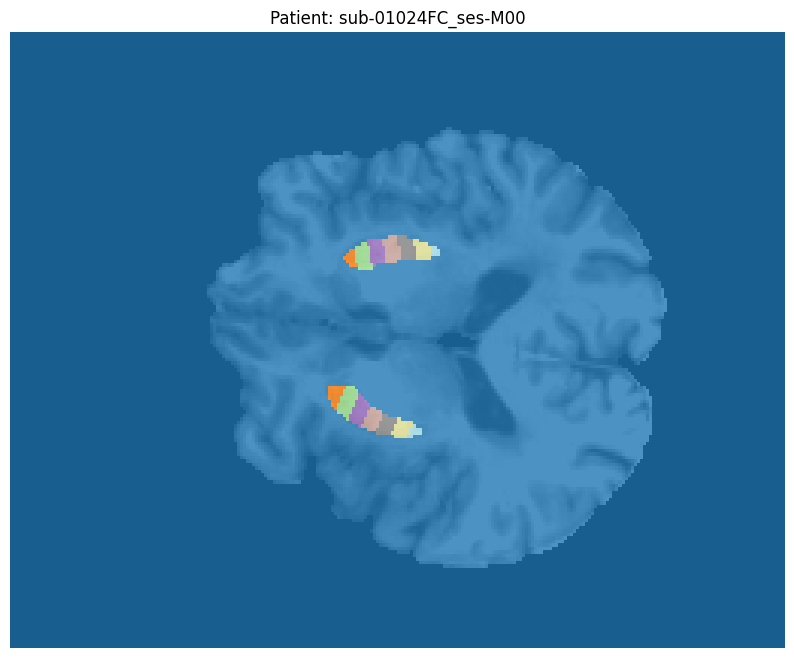

[0.9571199524298049, 1.0088874387565134, 1.0587947409766822, 1.1549400219608053, 1.2278784142324217, 1.2313799347917913, 1.2005403289547214, 0.9429769504349679, 1.0387423770570663, 1.1582926867469665, 1.2261415701320624, 1.3140567347921175, 1.273347247079764, 1.2052999028693074]


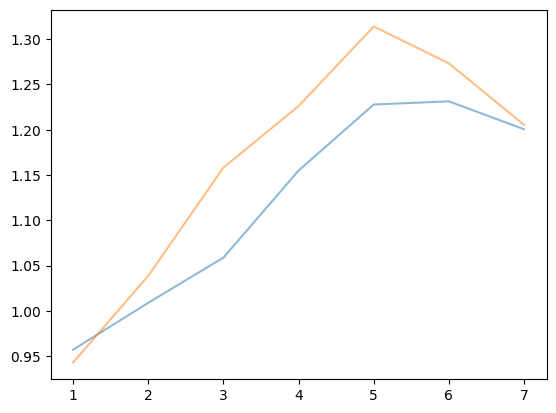

In [ ]:
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"

for patient_dir in glob.glob(os.path.join(base_dir, "sub-01024FC_ses-M00")):
    patient_id = os.path.basename(patient_dir)
    print(f"Traitement du patient : {patient_id}")

    # Chemins des fichiers pour le patient actuel
    t1overt2_file = os.path.join(patient_dir, "t1overt2_norm_PSR.nii.gz")
    left_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
    right_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

    print(f"freeview -layout 1 -viewport axial {t1overt2_file}:grayscale=0,10 {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
    
    # Extract the patient ID and format it to match df_cleaned.index
    patient_id = os.path.basename(patient_dir)
    subject = patient_id.replace("sub-", "").replace("_ses-M00", "")
    subject = subject[:2] + "-" + subject[2:-2]
    if subject in df_cleaned.index:
        # Lire les images NIfTI
        t1overt2_img = nib.load(t1overt2_file)
        t1overt2_data = t1overt2_img.get_fdata()

        left_seg_img = nib.load(left_seg_file)
        left_seg_data = left_seg_img.get_fdata()

        right_seg_img = nib.load(right_seg_file)
        right_seg_data = right_seg_img.get_fdata()

        # Créer une figure pour le patient actuel
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))

        # Créer une table de couleurs pour les segmentations
        colors = cm.tab20(np.linspace(0, 1, 20))
        cmap = ListedColormap(colors)

        # Afficher l'image T1/T2 en niveaux de gris
        slice_idx = np.argmax(np.sum(left_seg_data, axis=(0, 2)))  # Trouver la slice avec la plus grande intégrale

        # Afficher les segmentations avec la table de couleurs et une transparence
        left_seg_slice = left_seg_data[:, slice_idx,:].T
        right_seg_slice = right_seg_data[:, slice_idx,:].T

        # Combiner les segmentations gauche et droite
        combined_seg_slice = left_seg_slice + right_seg_slice
        combined_seg_slice = np.where(combined_seg_slice > 0, combined_seg_slice, 0)

        min_val = np.percentile(t1overt2_data[:, slice_idx, :], 5)
        max_val = np.percentile(t1overt2_data[:, slice_idx, :], 95)
        ax.imshow(t1overt2_data[:, slice_idx, :].T, cmap='gray', origin='lower', aspect='auto', vmin=min_val, vmax=max_val)
        ax.imshow(combined_seg_slice, cmap=cmap, origin='lower', alpha=0.8, aspect='auto')

        # Ajouter un titre avec l'ID du patient
        ax.set_title(f"Patient: {patient_id}")
        ax.axis('off')
        
        plt.show()

        # Calculate the mean of t1overt2_data for each ROI in left_seg_data
        rois_values = []
        for roi in range(1,8):
            roi_mask = left_seg_data == roi
            roi_mean = t1overt2_data[roi_mask].mean()
            rois_values.append(roi_mean)

        for roi in range(1,8):
            roi_mask = right_seg_data == roi
            roi_mean = t1overt2_data[roi_mask].mean()
            rois_values.append(roi_mean)

        print(rois_values)
        plt.plot(range(1, 8), rois_values[:7], alpha=0.5, label=f"{subject} (Left)")
        plt.plot(range(1, 8), rois_values[7:], alpha=0.5, label=f"{subject} (Right)")
        plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
# Tracer chaque ligne avec une opacité de 0.2
for index, row in df.iterrows():
    plt.plot(range(1, len(row) + 1), row.values, alpha=0.2, color='blue')

# Tracer la moyenne
mean_values = df.mean()
plt.plot(range(1, len(mean_values) + 1), mean_values, color='red', label='Mean', linewidth=2)

# Ajouter les labels et la légende
plt.title('Plot of Each Line with Mean')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [ ]:
# Chemin vers le répertoire contenant les données des patients
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"

# Créer un fichier PDF pour sauvegarder les figures
pdf_filename = os.path.join(base_dir, "negatoscope_figures_t1overt2_new.pdf")

sorted_patient_dirs = sorted(glob.glob(os.path.join(base_dir, "sub-*00")))

with PdfPages(pdf_filename) as pdf:
    # Parcourir les répertoires des patients
    for patient_dir in sorted_patient_dirs:
        # Extraire l'ID du patient à partir du nom du répertoire
        patient_id = os.path.basename(patient_dir)
        # print(f"Traitement du patient : {patient_id}")

        # Chemins des fichiers pour le patient actuel
        t1overt2_file = os.path.join(patient_dir, "t1overt2_norm_PSR.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "QSMover_PSR.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "r2_norm_PSR.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "t1_PSR.nii.gz")
        left_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
        right_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

        print(f"freeview -layout 1 -viewport axial {t1overt2_file}:grayscale=0,10 {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
        # Vérifier si les fichiers existent
        if not all(os.path.exists(f) for f in [t1overt2_file, left_seg_file, right_seg_file]):
             print(f"Fichiers manquants pour le patient {patient_id}, passage au suivant.")
             continue

        # Lire les images NIfTI
        t1overt2_img = nib.load(t1overt2_file)
        t1overt2_data = t1overt2_img.get_fdata()

        left_seg_img = nib.load(left_seg_file)
        left_seg_data = left_seg_img.get_fdata()

        right_seg_img = nib.load(right_seg_file)
        right_seg_data = right_seg_img.get_fdata()

        # Créer une figure pour le patient actuel
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))

        # Créer une table de couleurs pour les segmentations
        colors = cm.tab20(np.linspace(0, 1, 20))
        cmap = ListedColormap(colors)

        # Afficher l'image T1/T2 en niveaux de gris
        slice_idx = np.argmax(np.sum(left_seg_data, axis=(0, 2)))  # Trouver la slice avec la plus grande intégrale

        # Afficher les segmentations avec la table de couleurs et une transparence
        left_seg_slice = left_seg_data[:, slice_idx,:].T
        right_seg_slice = right_seg_data[:, slice_idx,:].T

        # Combiner les segmentations gauche et droite
        combined_seg_slice = left_seg_slice + right_seg_slice
        combined_seg_slice = np.where(combined_seg_slice > 0, combined_seg_slice, 0)

        # Calculer les coordonnées du barycentre pour les ROIs 1 et 7 pour left et right
        # Barycentre pour le ROI dans la segmentation gauche
        left_coords_1 = np.argwhere(left_seg_data == 1)
        left_barycenter_1 = np.mean(left_coords_1, axis=0) if left_coords_1.size > 0 else None

        left_coords_7 = np.argwhere(left_seg_data == 7)
        left_barycenter_7 = np.mean(left_coords_7, axis=0) if left_coords_7.size > 0 else None

        if left_barycenter_1[0] > left_barycenter_7[0]:
            print(f"python inverseROInumber.py {left_seg_file}")

        # Barycentre pour le ROI dans la segmentation droite
        right_coords_1 = np.argwhere(right_seg_data == 1)
        right_barycenter_1 = np.mean(right_coords_1, axis=0) if right_coords_1.size > 0 else None

        right_coords_7 = np.argwhere(right_seg_data == 7)
        right_barycenter_7 = np.mean(right_coords_7, axis=0) if right_coords_7.size > 0 else None

        if right_barycenter_1[0] > right_barycenter_7[0]:
            print(f"python inverseROInumber.py {right_seg_file}")

        min_val = np.percentile(t1overt2_data[:, slice_idx, :], 5)
        max_val = np.percentile(t1overt2_data[:, slice_idx, :], 95)
        ax.imshow(t1overt2_data[:, slice_idx, :].T, cmap='gray', origin='lower', aspect='auto', vmin=min_val, vmax=max_val)
        ax.imshow(combined_seg_slice, cmap=cmap, origin='lower', alpha=0.8, aspect='auto')

        # Ajouter un titre avec l'ID du patient
        ax.set_title(f"Patient: {patient_id}")
        ax.axis('off')
        
        #plt.show()
        # Ajouter la figure au PDF
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

print(f"PDF sauvegardé sous le nom : {pdf_filename}")


freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/t1overt2_norm_PSR.nii.gz:grayscale=0,10 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5;
freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01002TM_ses-M00/t1overt2_norm_PSR.nii.gz:grayscale=0,10 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01002TM_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-0100

In [ ]:
# Chemin vers le répertoire contenant les données des patients
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"

# Créer un fichier PDF pour sauvegarder les figures
pdf_filename = os.path.join(base_dir, "negatoscope_figures_t1overt2Only.pdf")

sorted_patient_dirs = sorted(glob.glob(os.path.join(base_dir, "sub-*00")))

# Parcourir les répertoires des patients
for patient_dir in sorted_patient_dirs:
    # Extraire l'ID du patient à partir du nom du répertoire
    patient_id = os.path.basename(patient_dir)
    #print(f"Traitement du patient : {patient_id}")

    # Chemins des fichiers pour le patient actuel
    t1overt2_file = os.path.join(patient_dir, "t1overt2_norm_PSR.nii.gz")
    left_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
    right_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

    # Vérifier si les fichiers existent
    if not all(os.path.exists(f) for f in [t1overt2_file, left_seg_file, right_seg_file]):
        #print(f"Fichiers manquants pour le patient {patient_id}, passage au suivant.")
        continue

    #print(f"freeview -layout 1 -viewport axial {t1overt2_file}:grayscale=0,10 {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
    #print(f"python inverseROInumber.py {right_seg_file}")
    #print(f"python inverseROInumber.py {left_seg_file}")   
    print(f"fslstats -K {left_seg_file} {t1overt2_file} -M > {patient_dir}/patient_id_left-putamen_axis1_7segments_t1overt2_mean_values.txt")
    print(f"fslstats -K {right_seg_file} {t1overt2_file} -M > {patient_dir}/patient_id_right-putamen_axis1_7segments_t1overt2_mean_values.txt")


fslstats -K /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/t1overt2_norm_PSR.nii.gz -M > /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/patient_id_left-putamen_axis1_7segments_t1overt2_values.txt
fslstats -K /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01001SR_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01001SR_ses-M00/t1overt2_norm_PSR.nii.gz -M > /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-010


=== Traitement de T1overT2 ===
sub-01013PR_ses-M00
sub-01019LJ_ses-M00
sub-01010VD_ses-M00
sub-01043GC_ses-M00
sub-01047DM_ses-M00
sub-02039CJ_ses-M00
sub-02065GJ_ses-M00
sub-02069VF_ses-M00
sub-02074AS_ses-M00
sub-02073MD_ses-M00
sub-02083SG_ses-M00
sub-02089SL_ses-M00
sub-02087TD_ses-M00
sub-05011VJ_ses-M00
sub-05024PM_ses-M00
sub-05023GV_ses-M00
sub-05030DN_ses-M00
sub-05034CM_ses-M00
sub-05036PJ_ses-M00
sub-06010FC_ses-M00
sub-06016RM_ses-M00
sub-06021RJ_ses-M00
sub-06025BI_ses-M00
sub-06034BS_ses-M00
sub-06029BN_ses-M00
sub-06059GD_ses-M00
sub-06078BS_ses-M00
sub-07015IA_ses-M00
sub-07019VJ_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07031DA_ses-M00
sub-07041GA_ses-M00
sub-07039FJ_ses-M00
sub-07055BC_ses-M00
sub-07053LJ_ses-M00
sub-07058PP_ses-M00
sub-07081LC_ses-M00
sub-07091MC_ses-M00
sub-07092DH_ses-M00
sub-07098CA_ses-M00
sub-08005DY_ses-M00
sub-08018JC_ses-M00
sub-08017DV_ses-M00
sub-08023LJ_ses-M00
sub-08028BC_ses-M00
sub-08027BB_ses-M00
sub-08036GE_ses-M00
sub-0901

/tmp/ipykernel_2821713/367239030.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2821713/367239030.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2821713/367239030.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

R²: 0.0004, P-value: 6.4263e-01


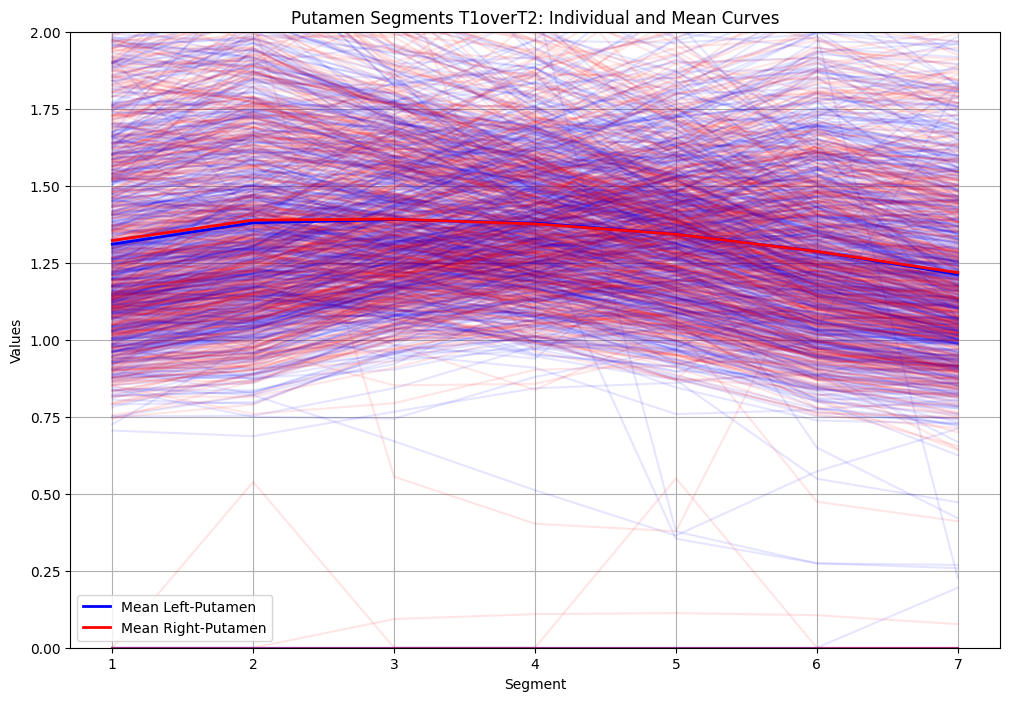

Fichiers manquants pour sub-01013PR_ses-M00 dans T1overT2
Fichiers manquants pour sub-01019LJ_ses-M00 dans T1overT2
Fichiers manquants pour sub-01010VD_ses-M00 dans T1overT2
Fichiers manquants pour sub-01043GC_ses-M00 dans T1overT2
Fichiers manquants pour sub-01047DM_ses-M00 dans T1overT2
Fichiers manquants pour sub-01024FC_ses-M00 dans T1overT2
Fichiers manquants pour sub-01012BB_ses-M00 dans T1overT2
Fichiers manquants pour sub-01008GM_ses-M00 dans T1overT2
Fichiers manquants pour sub-01006DF_ses-M00 dans T1overT2
Fichiers manquants pour sub-01009WF_ses-M00 dans T1overT2
Fichiers manquants pour sub-01004DJ_ses-M00 dans T1overT2
Fichiers manquants pour sub-01035RM_ses-M00 dans T1overT2
Fichiers manquants pour sub-01034UG_ses-M00 dans T1overT2
Fichiers manquants pour sub-01040LC_ses-M00 dans T1overT2
Fichiers manquants pour sub-01039AC_ses-M00 dans T1overT2
Fichiers manquants pour sub-01001SR_ses-M00 dans T1overT2
Fichiers manquants pour sub-01018MT_ses-M00 dans T1overT2
Fichiers manqu

/tmp/ipykernel_2821713/367239030.py:218: MatplotlibDeprecationWarning:

Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.



sub-01013PR_ses-M00
sub-01019LJ_ses-M00
sub-01010VD_ses-M00
sub-01043GC_ses-M00
sub-01047DM_ses-M00
sub-02039CJ_ses-M00
sub-02065GJ_ses-M00
sub-02069VF_ses-M00
sub-02074AS_ses-M00
sub-02073MD_ses-M00
sub-02083SG_ses-M00
sub-02089SL_ses-M00
sub-02087TD_ses-M00
sub-05011VJ_ses-M00
sub-05024PM_ses-M00
sub-05023GV_ses-M00
sub-05030DN_ses-M00
sub-05034CM_ses-M00
sub-05036PJ_ses-M00
sub-06010FC_ses-M00
sub-06016RM_ses-M00
sub-06021RJ_ses-M00
sub-06025BI_ses-M00
sub-06034BS_ses-M00
sub-06029BN_ses-M00
sub-06059GD_ses-M00
sub-06078BS_ses-M00
sub-07015IA_ses-M00
sub-07019VJ_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07031DA_ses-M00
sub-07041GA_ses-M00
sub-07039FJ_ses-M00
sub-07055BC_ses-M00
sub-07053LJ_ses-M00
sub-07058PP_ses-M00
sub-07081LC_ses-M00
sub-07091MC_ses-M00
sub-07092DH_ses-M00
sub-07098CA_ses-M00
sub-08005DY_ses-M00
sub-08018JC_ses-M00
sub-08017DV_ses-M00
sub-08023LJ_ses-M00
sub-08028BC_ses-M00
sub-08027BB_ses-M00
sub-08036GE_ses-M00
sub-09018CT_ses-M00
sub-09009GM_ses-M00


/tmp/ipykernel_2821713/367239030.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2821713/367239030.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2821713/367239030.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

R²: 0.0001, P-value: 7.7084e-01


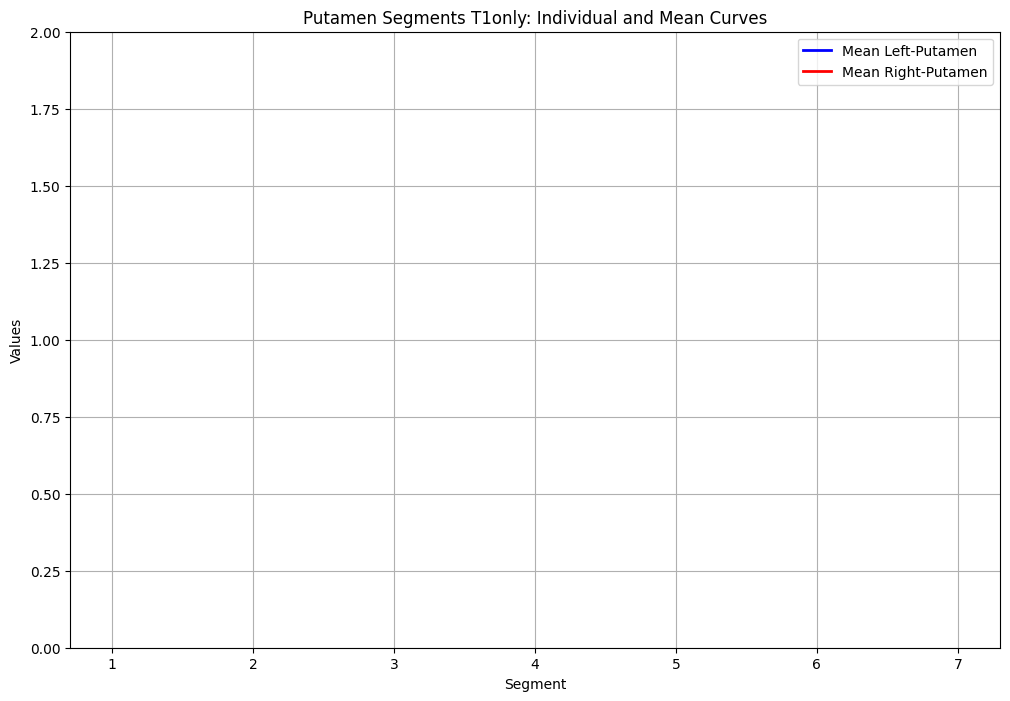

Fichiers manquants pour sub-01013PR_ses-M00 dans T1only
Fichiers manquants pour sub-01019LJ_ses-M00 dans T1only
Fichiers manquants pour sub-01010VD_ses-M00 dans T1only
Fichiers manquants pour sub-01043GC_ses-M00 dans T1only
Fichiers manquants pour sub-01047DM_ses-M00 dans T1only
Fichiers manquants pour sub-01024FC_ses-M00 dans T1only
Fichiers manquants pour sub-01012BB_ses-M00 dans T1only
Fichiers manquants pour sub-01008GM_ses-M00 dans T1only
Fichiers manquants pour sub-01006DF_ses-M00 dans T1only
Fichiers manquants pour sub-01009WF_ses-M00 dans T1only
Fichiers manquants pour sub-01004DJ_ses-M00 dans T1only
Fichiers manquants pour sub-01035RM_ses-M00 dans T1only
Fichiers manquants pour sub-01034UG_ses-M00 dans T1only
Fichiers manquants pour sub-01040LC_ses-M00 dans T1only
Fichiers manquants pour sub-01039AC_ses-M00 dans T1only
Fichiers manquants pour sub-01001SR_ses-M00 dans T1only
Fichiers manquants pour sub-01018MT_ses-M00 dans T1only
Fichiers manquants pour sub-01011BB_ses-M00 dans

/tmp/ipykernel_2821713/367239030.py:218: MatplotlibDeprecationWarning:

Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.



sub-01019LJ_ses-M00
sub-06010FC_ses-M00
sub-06016RM_ses-M00
sub-06021RJ_ses-M00
sub-06025BI_ses-M00
sub-06034BS_ses-M00
sub-06029BN_ses-M00
sub-06078BS_ses-M00
sub-07015IA_ses-M00
sub-07019VJ_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07039FJ_ses-M00
sub-07055BC_ses-M00
sub-07053LJ_ses-M00
sub-07058PP_ses-M00
sub-07081LC_ses-M00
sub-07091MC_ses-M00
sub-07092DH_ses-M00
sub-07098CA_ses-M00
sub-08005DY_ses-M00
sub-08017DV_ses-M00
sub-08023LJ_ses-M00
sub-08028BC_ses-M00
sub-08036GE_ses-M00
sub-17010BG_ses-M00
sub-17020LP_ses-M00
sub-17024BR_ses-M00
sub-17022PG_ses-M00
sub-17030GR_ses-M00
sub-17032TJ_ses-M00
sub-17040MD_ses-M00
sub-17043MG_ses-M00
sub-17050PD_ses-M00
sub-17071PM_ses-M00
sub-19010DJ_ses-M00
sub-19009AP_ses-M00
sub-19012GD_ses-M00
sub-19024MY_ses-M00
sub-19026MY_ses-M00
sub-19028LC_ses-M00
sub-19045LE_ses-M00
sub-19048EC_ses-M00
sub-01024FC_ses-M00
sub-06012DH_ses-M00
sub-06003LP_ses-M00
sub-06027RC_ses-M00
sub-06058DC_ses-M00
sub-06086VN_ses-M00
sub-07021FC_ses-M00


/tmp/ipykernel_2821713/367239030.py:105: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_2821713/367239030.py:106: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_2821713/367239030.py:107: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



R²: 0.0041, P-value: 3.1846e-01


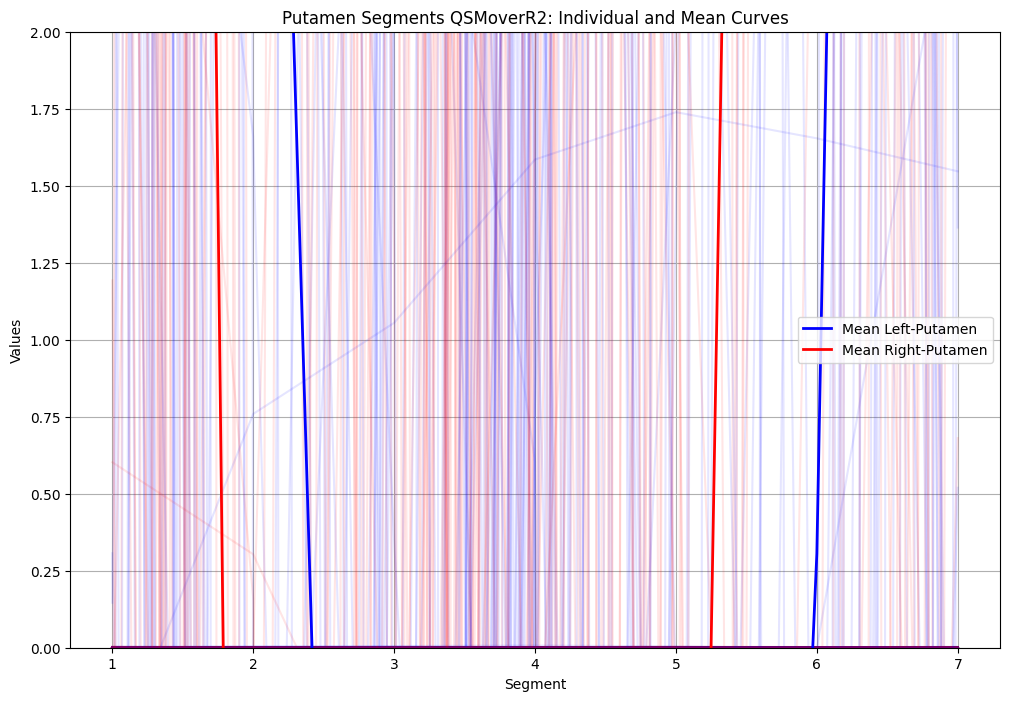

Fichiers manquants pour sub-01013PR_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01019LJ_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01010VD_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01043GC_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01047DM_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01024FC_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01012BB_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01008GM_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01006DF_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01009WF_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01004DJ_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01035RM_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01034UG_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01040LC_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01039AC_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01001SR_ses-M00 dans QSMoverR2
Fichiers manquants pour sub-01018MT_ses-M00 dans QSMover

/tmp/ipykernel_2821713/367239030.py:218: MatplotlibDeprecationWarning:

Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.



sub-01019LJ_ses-M00
sub-02065GJ_ses-M00
sub-02069VF_ses-M00
sub-02089SL_ses-M00
sub-02087TD_ses-M00
sub-05011VJ_ses-M00
sub-05024PM_ses-M00
sub-05023GV_ses-M00
sub-05030DN_ses-M00
sub-05034CM_ses-M00
sub-05036PJ_ses-M00
sub-06010FC_ses-M00
sub-06016RM_ses-M00
sub-06021RJ_ses-M00
sub-06025BI_ses-M00
sub-06034BS_ses-M00
sub-06029BN_ses-M00
sub-06078BS_ses-M00
sub-07015IA_ses-M00
sub-07019VJ_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07039FJ_ses-M00
sub-07055BC_ses-M00
sub-07053LJ_ses-M00
sub-07058PP_ses-M00
sub-07081LC_ses-M00
sub-07091MC_ses-M00
sub-07092DH_ses-M00
sub-07098CA_ses-M00
sub-08005DY_ses-M00
sub-08017DV_ses-M00
sub-08023LJ_ses-M00
sub-08028BC_ses-M00
sub-08036GE_ses-M00
sub-09018CT_ses-M00
sub-11028BA_ses-M00
sub-14024FP_ses-M00
sub-17010BG_ses-M00
sub-17020LP_ses-M00
sub-17024BR_ses-M00
sub-17022PG_ses-M00
sub-17030GR_ses-M00
sub-17032TJ_ses-M00
sub-17040MD_ses-M00
sub-17043MG_ses-M00
sub-17050PD_ses-M00
sub-17071PM_ses-M00
sub-18007BF_ses-M00
sub-18004MD_ses-M00


/tmp/ipykernel_2821713/367239030.py:105: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_2821713/367239030.py:106: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_2821713/367239030.py:107: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



R²: 0.0005, P-value: 6.6469e-01


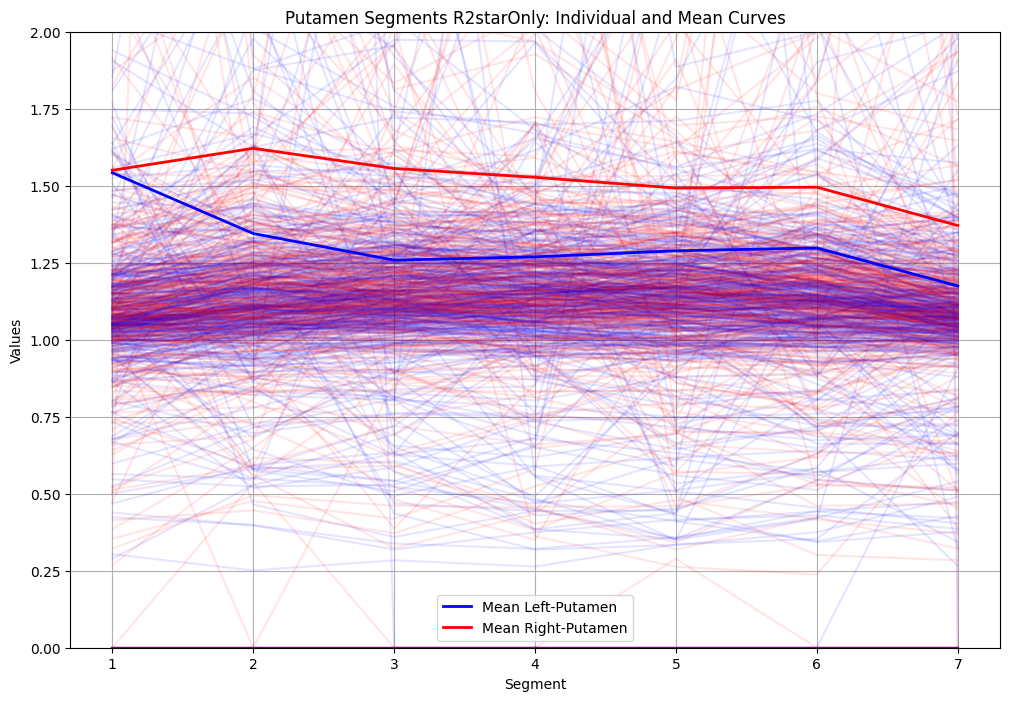

Fichiers manquants pour sub-01013PR_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01019LJ_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01010VD_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01043GC_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01047DM_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01024FC_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01012BB_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01008GM_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01006DF_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01009WF_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01004DJ_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01035RM_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01034UG_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01040LC_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01039AC_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01001SR_ses-M00 dans R2starOnly
Fichiers manquants pour sub-01018MT_ses-

/tmp/ipykernel_2821713/367239030.py:218: MatplotlibDeprecationWarning:

Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.



In [13]:
import os
import pandas as pd
from scipy.io import loadmat
import glob
from plotnine import ggplot, aes, geom_point, labs
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_errorbar, geom_line, geom_point, labs, theme_minimal
import plotly.express as px
import statsmodels.api as sm
import nibabel as nib
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Définir les différents patterns de fichiers
file_patterns = {
    "T1overT2": "sub-*/mrGrad/mrGrad_t1overt2.mat",
    "T1only": "sub-*/mrGradT1only/mrGrad_t1overt2.mat", 
    "QSMoverR2": "sub-*/mrGradQSMoverR2/mrGrad_t1overt2.mat",
    "R2starOnly": "sub-*/mrGradR2/mrGrad_t1overt2.mat"
}

# Chemin vers les fichiers
base_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/"

# Itérer sur chaque pattern
for pattern_name, file_pattern in file_patterns.items():
    print(f"\n=== Traitement de {pattern_name} ===")
    
    # Récupérer les chemins des fichiers
    file_paths = glob.glob(os.path.join(base_path, file_pattern), recursive=True)
    
    if not file_paths:
        print(f"Aucun fichier trouvé pour le pattern {pattern_name}")
        continue
    
    # Initialiser une liste pour stocker les données
    data = []
    
    # Parcourir les fichiers et charger les données
    for file_path in file_paths:
        mat_data = loadmat(file_path)
        try:
            subject_names = str(mat_data['RG'][0][0]['subject_names'][0][0][0][0][0])
            print(subject_names)
            
            try:
                roi_label_0 = mat_data['RG'][0][0]['ROI_label'][0][0][0]
                roi_label_1 = mat_data['RG'][0][1]['ROI_label'][0][0][0]
                y_data_0 = np.array(mat_data['RG'][0][0]['Y'][0][0][0][0]).flatten()
                y_data_1 = np.array(mat_data['RG'][0][1]['Y'][0][0][0][0]).flatten()

                data.append({
                    'subject_name': subject_names,
                    f"{roi_label_0}_seg1": y_data_0[0],
                    f"{roi_label_0}_seg2": y_data_0[1],
                    f"{roi_label_0}_seg3": y_data_0[2],
                    f"{roi_label_0}_seg4": y_data_0[3],
                    f"{roi_label_0}_seg5": y_data_0[4],
                    f"{roi_label_0}_seg6": y_data_0[5],
                    f"{roi_label_0}_seg7": y_data_0[6],
                    f"{roi_label_1}_seg1": y_data_1[0],
                    f"{roi_label_1}_seg2": y_data_1[1],
                    f"{roi_label_1}_seg3": y_data_1[2],
                    f"{roi_label_1}_seg4": y_data_1[3],
                    f"{roi_label_1}_seg5": y_data_1[4],
                    f"{roi_label_1}_seg6": y_data_1[5],
                    f"{roi_label_1}_seg7": y_data_1[6],
                })
            except KeyError as e:
                print(f"KeyError: {e}. ROI_label et Y non trouvés.")
        except KeyError as e:
            print(f"KeyError: {e}. subject_names non trouvé.")
    
    if not data:
        print(f"Aucune donnée extraite pour {pattern_name}")
        continue
    
    # Créer un DataFrame
    df = pd.DataFrame(data).set_index('subject_name')
    
    # Clean index
    df_cleaned = df.dropna()
    df_cleaned.index = df_cleaned.index.str.replace("sub-", "", regex=False)
    df_cleaned.index = df_cleaned.index.str.replace("_ses-M00", "", regex=False)
    df_cleaned.index = df_cleaned.index.str.slice(0, 2).str.cat(df_cleaned.index.str.slice(2,-2), sep="-")
    
    # Calculer l'asymétrie pour chaque segment
    n_segments = 7
    for seg in range(1, n_segments + 1):
        left = df_cleaned[f"Left-Putamen_seg{seg}"]
        right = df_cleaned[f"Right-Putamen_seg{seg}"]
        asym = (left - right) / ((left + right) / 2)
        df_cleaned[f"Putamen_axis1_seg{seg}_asym"] = asym
    
    # Charger les données UPDRS (une seule fois, identique pour tous)
    df_msa = pd.read_excel(os.path.join(pl.STUDY_PATH, "csv_xlsx", "Romain_Juin2025.xlsx"), 
                           engine='openpyxl', sheet_name='UPDRSIII_COMPLET_V0')
    df_msa.set_index("SUBJID", inplace=True)
    
    droit_columns = df_msa.filter(regex="OF.*_.*DROIT", axis=1).columns
    gauche_columns = df_msa.filter(regex="OF.*_.*GCHE", axis=1).columns
    
    df_msa['somme_droit'] = df_msa[droit_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
    df_msa['somme_gauche'] = df_msa[gauche_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
    df_msa['asymetry'] = df_msa['somme_droit'] - df_msa['somme_gauche']
    
    # Calcul de l'asymétrie pp pour les segments 5 à 7
    pp_segments = [f"Putamen_axis1_seg{seg}_asym" for seg in range(5, 8)]
    df_cleaned["pp_asym"] = df_cleaned[pp_segments].mean(axis=1)
    
    # Intersection des données
    intersection_index = df_cleaned.index.intersection(df_msa.index)
    df_intersection = pd.DataFrame({
        'T1overT2_asymetry_seg': df_cleaned.loc[intersection_index, 'pp_asym'],
        'motor_symptom_asymetry': df_msa.loc[intersection_index, 'asymetry']
    })
    df_intersection.dropna(inplace=True)
    
    if df_intersection.empty:
        print(f"Pas de données communes pour {pattern_name}")
        continue
    
    # Filtrage des outliers
    df_intersection = df_intersection[
        (df_intersection['T1overT2_asymetry_seg'] <= 50) & 
        (df_intersection['T1overT2_asymetry_seg'] > -50)
    ]
    
    df_intersection['Group'] = df_intersection.index.str.slice(0, 2)
    
    # Création du scatter plot
    fig = px.scatter(
        df_intersection,
        y='motor_symptom_asymetry',
        x='T1overT2_asymetry_seg',
        color='Group',
        hover_name=df_intersection.index,
        labels={
            'T1overT2_asymetry_seg': 'Radiological Asymmetry',
            'motor_symptom_asymetry': 'Motor Symptom Asymmetry'
        },
        title=f"Scatter Plot {pattern_name}: Radiological Asymmetry vs Motor Symptom Asymmetry"
    )
    
    # Ajouter les axes de référence
    fig.add_shape(type="line", x0=df_intersection['T1overT2_asymetry_seg'].min(),
                  x1=df_intersection['T1overT2_asymetry_seg'].max(), y0=0, y1=0,
                  line=dict(color="gray", dash="dot"))
    
    fig.add_shape(type="line", x0=0, x1=0, y0=df_intersection['motor_symptom_asymetry'].min(),
                  y1=df_intersection['motor_symptom_asymetry'].max(),
                  line=dict(color="gray", dash="dot"))
    
    # Régression
    X = df_intersection['T1overT2_asymetry_seg']
    y = df_intersection['motor_symptom_asymetry']
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    df_intersection['regression_line'] = model.predict(X_const)
    
    fig.add_trace(px.line(df_intersection, x='T1overT2_asymetry_seg', y='regression_line').data[0])
    
    r_squared = model.rsquared
    p_value = model.pvalues.iloc[1]
    print(f"R²: {r_squared:.4f}, P-value: {p_value:.4e}")
    
    # Sauvegarder le scatter plot avec le nom du pattern
    fig.write_image(f"/NAS/deathrow/protocoles/predistim/screenshots/scatter_{pattern_name}_vs_motor_symptom_asymmetry.png")
    fig.show()
    
    # Graphique des lignes de putamen
    left_columns = [f"Left-Putamen_seg{i}" for i in range(1, n_segments + 1)]
    right_columns = [f"Right-Putamen_seg{i}" for i in range(1, n_segments + 1)]
    
    plt.figure(figsize=(12, 8))
    
    # Courbes individuelles transparentes
    for subject in df_cleaned.index:
        plt.plot(range(1, len(left_columns) + 1), df_cleaned.loc[subject, left_columns], 
                color='blue', alpha=0.1)
        plt.plot(range(1, len(right_columns) + 1), df_cleaned.loc[subject, right_columns], 
                color='red', alpha=0.1)
    
    # Moyennes
    plt.plot(range(1, len(left_columns) + 1), df_cleaned[left_columns].mean(), 
            color='blue', label='Mean Left-Putamen', linewidth=2)
    plt.plot(range(1, len(right_columns) + 1), df_cleaned[right_columns].mean(), 
            color='red', label='Mean Right-Putamen', linewidth=2)
    
    plt.title(f'Putamen Segments {pattern_name}: Individual and Mean Curves')
    plt.xlabel('Segment')
    plt.ylabel('Values')
    plt.xticks(range(1, len(left_columns) + 1))
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 2)
    
    # Sauvegarder le graphique des lignes avec le nom du pattern
    plt.savefig(f"/NAS/deathrow/protocoles/predistim/screenshots/{pattern_name}_LinesPlot4AllSubjs.png")
    plt.show()
    
    # Création du PDF avec négatoscope
    base_dir_pattern = base_path
    pdf_filename = os.path.join(base_dir_pattern, f"negatoscope_figures_{pattern_name}.pdf")
    
    # Déterminer le nom du fichier d'image en fonction du pattern
    image_file_mapping = {
        "mrGrad": "t1overt2_norm_PSR.nii.gz",
        "mrGradT1only": "t1_norm_PSR.nii.gz", 
        "mrGradQSMoverR2": "QSMoverR2_norm_PSR.nii.gz",
        "mrGradR2": "r2_norm_PSR.nii.gz"
    }
    
    image_filename = image_file_mapping.get(pattern_name, "t1overt2_norm_PSR.nii.gz")
    
    with PdfPages(pdf_filename) as pdf:
        for patient_dir in glob.glob(os.path.join(base_dir_pattern, "sub-010*")):
            patient_id = os.path.basename(patient_dir)
            
            # Adapter le chemin en fonction du pattern
            t1overt2_file = os.path.join(patient_dir, image_filename)
            left_seg_file = os.path.join(patient_dir, pattern_name, "mrGradSeg", "subjectgroup_1", 
                                       patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
            right_seg_file = os.path.join(patient_dir, pattern_name, "mrGradSeg", "subjectgroup_1", 
                                        patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")
            
            if not all(os.path.exists(f) for f in [t1overt2_file, left_seg_file, right_seg_file]):
                print(f"Fichiers manquants pour {patient_id} dans {pattern_name}")
                continue
            
            # Lire et traiter les images (code identique au précédent)
            t1overt2_img = nib.load(t1overt2_file)
            t1overt2_data = t1overt2_img.get_fdata()
            
            left_seg_img = nib.load(left_seg_file)
            left_seg_data = left_seg_img.get_fdata()
            
            right_seg_img = nib.load(right_seg_file)
            right_seg_data = right_seg_img.get_fdata()
            
            fig, ax = plt.subplots(1, 1, figsize=(10, 8))
            
            colors = cm.tab20(np.linspace(0, 1, 20))
            cmap = ListedColormap(colors)
            
            slice_idx = np.argmax(np.sum(left_seg_data, axis=(0, 2)))
            
            left_seg_slice = left_seg_data[:, slice_idx,:].T
            right_seg_slice = right_seg_data[:, slice_idx,:].T
            combined_seg_slice = left_seg_slice + right_seg_slice
            combined_seg_slice = np.where(combined_seg_slice > 0, combined_seg_slice, 0)
            
            min_val = np.percentile(t1overt2_data[:, slice_idx, :], 5)
            max_val = np.percentile(t1overt2_data[:, slice_idx, :], 95)
            ax.imshow(t1overt2_data[:, slice_idx, :].T, cmap='gray', origin='lower', 
                     aspect='auto', vmin=min_val, vmax=max_val)
            ax.imshow(combined_seg_slice, cmap=cmap, origin='lower', alpha=0.8, aspect='auto')
            
            ax.set_title(f"Patient: {patient_id} - {pattern_name}")
            ax.axis('off')
            
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)
    
    print(f"PDF sauvegardé sous le nom : {pdf_filename}")
    print(f"=== Fin du traitement de {pattern_name} ===\n")